# 📊 Cash Flow Visualizations & Pattern Analysis

Comprehensive visualizations to discover patterns and insights in the transaction data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

In [5]:
# Load all prepared data
weekly = pd.read_csv('../processed_data/weekly_cashflow.csv', parse_dates=['Week_Start'])
weekly_cat = pd.read_csv('../processed_data/weekly_cashflow_by_category.csv', parse_dates=['Week_Start'])
weekly_entity = pd.read_csv('../processed_data/weekly_cashflow_by_entity.csv', parse_dates=['Week_Start'])
df = pd.read_csv('../processed_data/transactions_with_weeks.csv', parse_dates=['Week_Start'])

print(f"Weekly data: {len(weekly)} weeks")
print(f"Categories: {weekly_cat.columns[1:].tolist()}")
print(f"Entities: {df['Name'].unique()}")

Weekly data: 44 weeks
Categories: ['AP', 'AR', 'Bank charges', 'Custom and Duty', 'Dividend payout', 'Interest charges', 'Interest income', 'Loan payment', 'Loan payment and interest charges', 'Loan receipt', 'Netting AP', 'Netting AR', 'Non Netting AP', 'Non Netting AR', 'Other', 'Other receipt', 'Payroll', 'Statutory contribution', 'Tax payable']
Entities: ['TW10' 'PH10' 'TH10' 'ID10' 'SS10' 'MY10' 'VN20' 'KR10']


C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2345859084.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../processed_data/transactions_with_weeks.csv', parse_dates=['Week_Start'])


---
## 1. 📈 Weekly Cash Flow Trends

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2839589367.py:31: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2839589367.py:31: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2839589367.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig('../outputs/01_weekly_cashflow_trend.png', dpi=150, bbox_inches='tight')
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2839589367.py:32: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.savefig('../outputs/01_weekly_cashflow_trend.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_fi

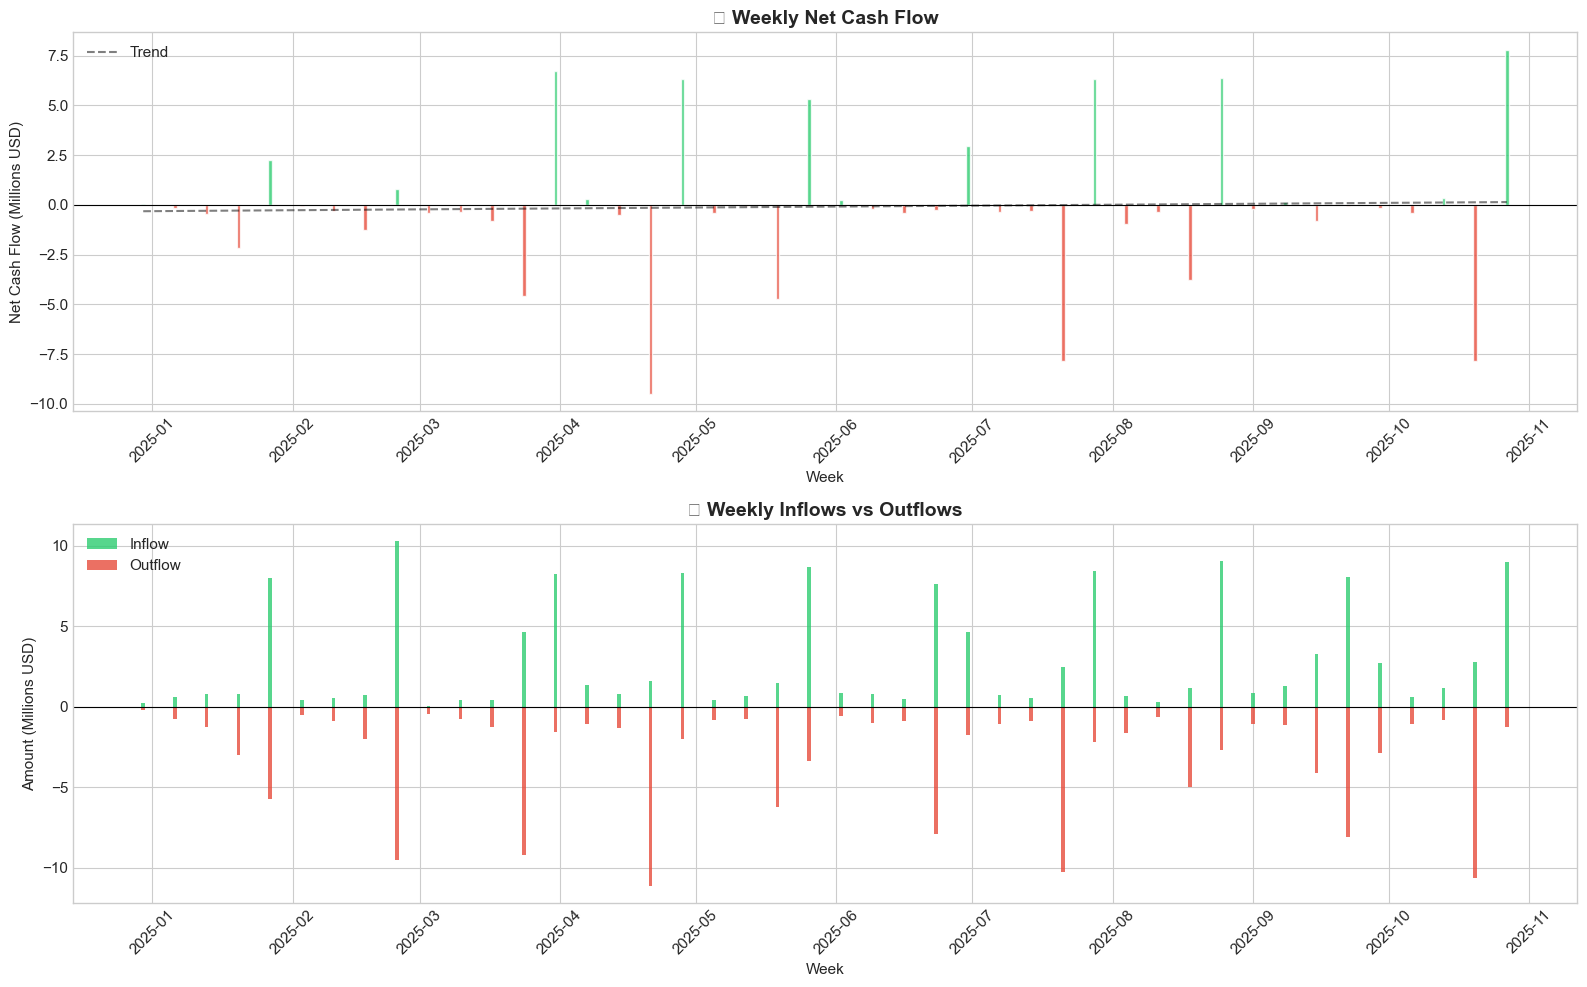

In [6]:
# Weekly Net Cash Flow Trend
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Net Cash Flow
ax1 = axes[0]
colors = ['#2ecc71' if x >= 0 else '#e74c3c' for x in weekly['Net_Cashflow']]
ax1.bar(weekly['Week_Start'], weekly['Net_Cashflow']/1e6, color=colors, alpha=0.8, edgecolor='white')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax1.set_xlabel('Week')
ax1.set_ylabel('Net Cash Flow (Millions USD)')
ax1.set_title('📈 Weekly Net Cash Flow', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Add trend line
z = np.polyfit(range(len(weekly)), weekly['Net_Cashflow']/1e6, 1)
p = np.poly1d(z)
ax1.plot(weekly['Week_Start'], p(range(len(weekly))), 'k--', alpha=0.5, label='Trend')
ax1.legend()

# Inflow vs Outflow
ax2 = axes[1]
ax2.bar(weekly['Week_Start'], weekly['Inflow']/1e6, label='Inflow', color='#2ecc71', alpha=0.8)
ax2.bar(weekly['Week_Start'], weekly['Outflow']/1e6, label='Outflow', color='#e74c3c', alpha=0.8)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.set_xlabel('Week')
ax2.set_ylabel('Amount (Millions USD)')
ax2.set_title('💰 Weekly Inflows vs Outflows', fontsize=14, fontweight='bold')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../outputs/01_weekly_cashflow_trend.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\3694184871.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\3694184871.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig('../outputs/02_cumulative_cashflow.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


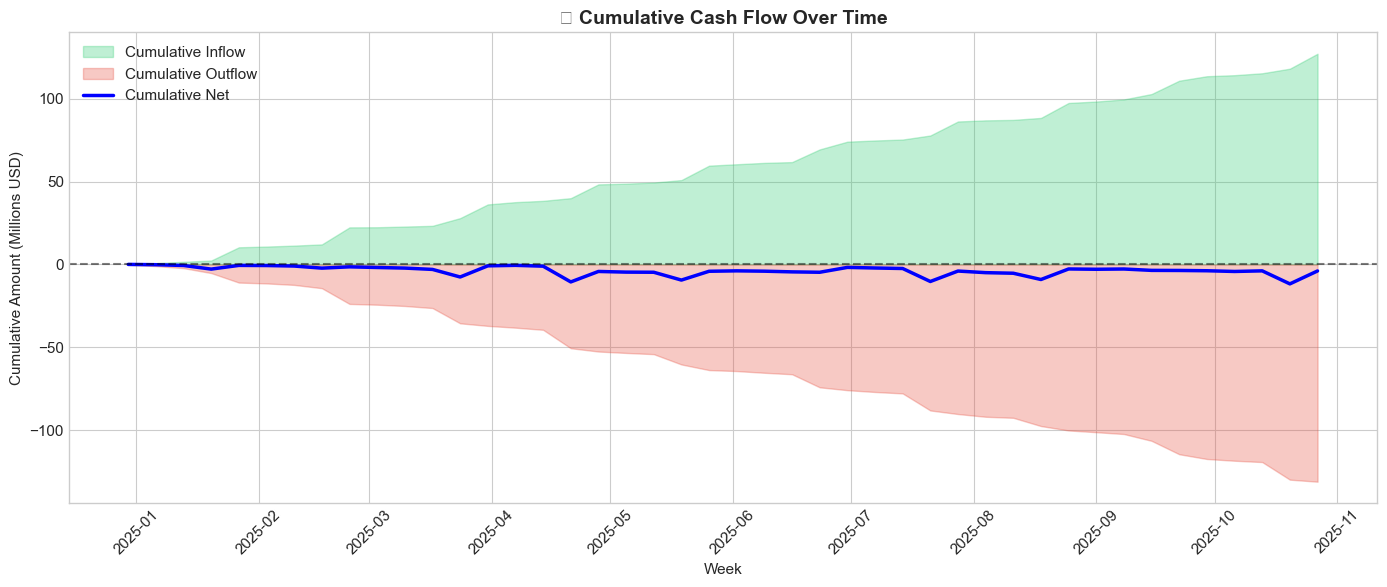

In [7]:
# Cumulative Cash Flow
weekly['Cumulative_Net'] = weekly['Net_Cashflow'].cumsum()
weekly['Cumulative_Inflow'] = weekly['Inflow'].cumsum()
weekly['Cumulative_Outflow'] = weekly['Outflow'].abs().cumsum()

fig, ax = plt.subplots(figsize=(14, 6))
ax.fill_between(weekly['Week_Start'], weekly['Cumulative_Inflow']/1e6, alpha=0.3, label='Cumulative Inflow', color='#2ecc71')
ax.fill_between(weekly['Week_Start'], -weekly['Cumulative_Outflow']/1e6, alpha=0.3, label='Cumulative Outflow', color='#e74c3c')
ax.plot(weekly['Week_Start'], weekly['Cumulative_Net']/1e6, 'b-', linewidth=2.5, label='Cumulative Net')
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.set_xlabel('Week')
ax.set_ylabel('Cumulative Amount (Millions USD)')
ax.set_title('📊 Cumulative Cash Flow Over Time', fontsize=14, fontweight='bold')
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('../outputs/02_cumulative_cashflow.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 2. 🏷️ Category Analysis

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\923530602.py:23: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\923530602.py:23: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\923530602.py:24: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  plt.savefig('../outputs/03_category_totals.png', dpi=150, bbox_inches='tight')
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\923530602.py:24: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) Arial.
  plt.savefig('../outputs/03_category_totals.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:

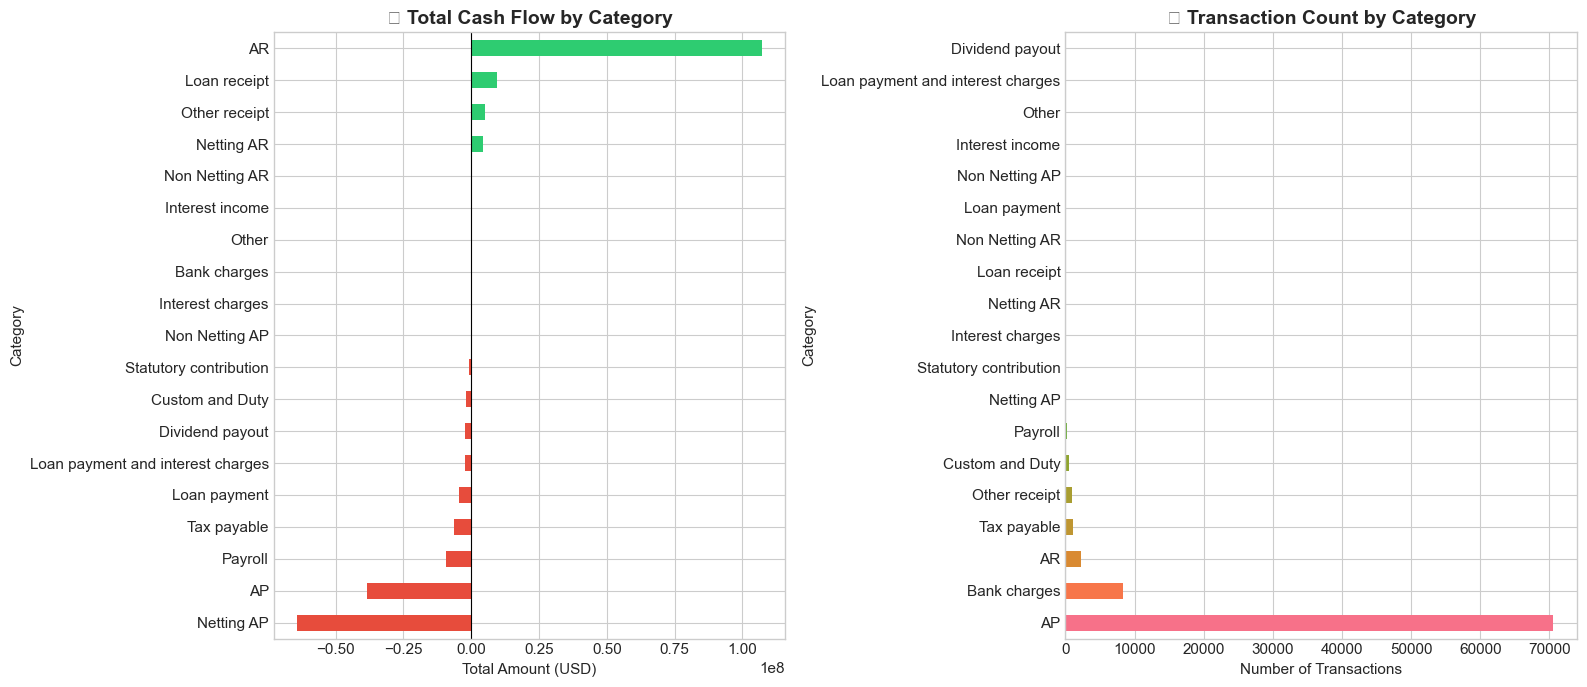

In [8]:
# Total by Category
cat_totals = df.groupby('Category')['Amount in USD'].sum().sort_values()

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Bar chart
ax1 = axes[0]
colors = ['#2ecc71' if x >= 0 else '#e74c3c' for x in cat_totals]
cat_totals.plot(kind='barh', ax=ax1, color=colors)
ax1.set_xlabel('Total Amount (USD)')
ax1.set_ylabel('Category')
ax1.set_title('💵 Total Cash Flow by Category', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Transaction count by category
ax2 = axes[1]
cat_counts = df['Category'].value_counts()
cat_counts.plot(kind='barh', ax=ax2, color=sns.color_palette('husl', len(cat_counts)))
ax2.set_xlabel('Number of Transactions')
ax2.set_ylabel('Category')
ax2.set_title('📝 Transaction Count by Category', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/03_category_totals.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\305828324.py:15: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\305828324.py:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.savefig('../outputs/04_top_categories_trend.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


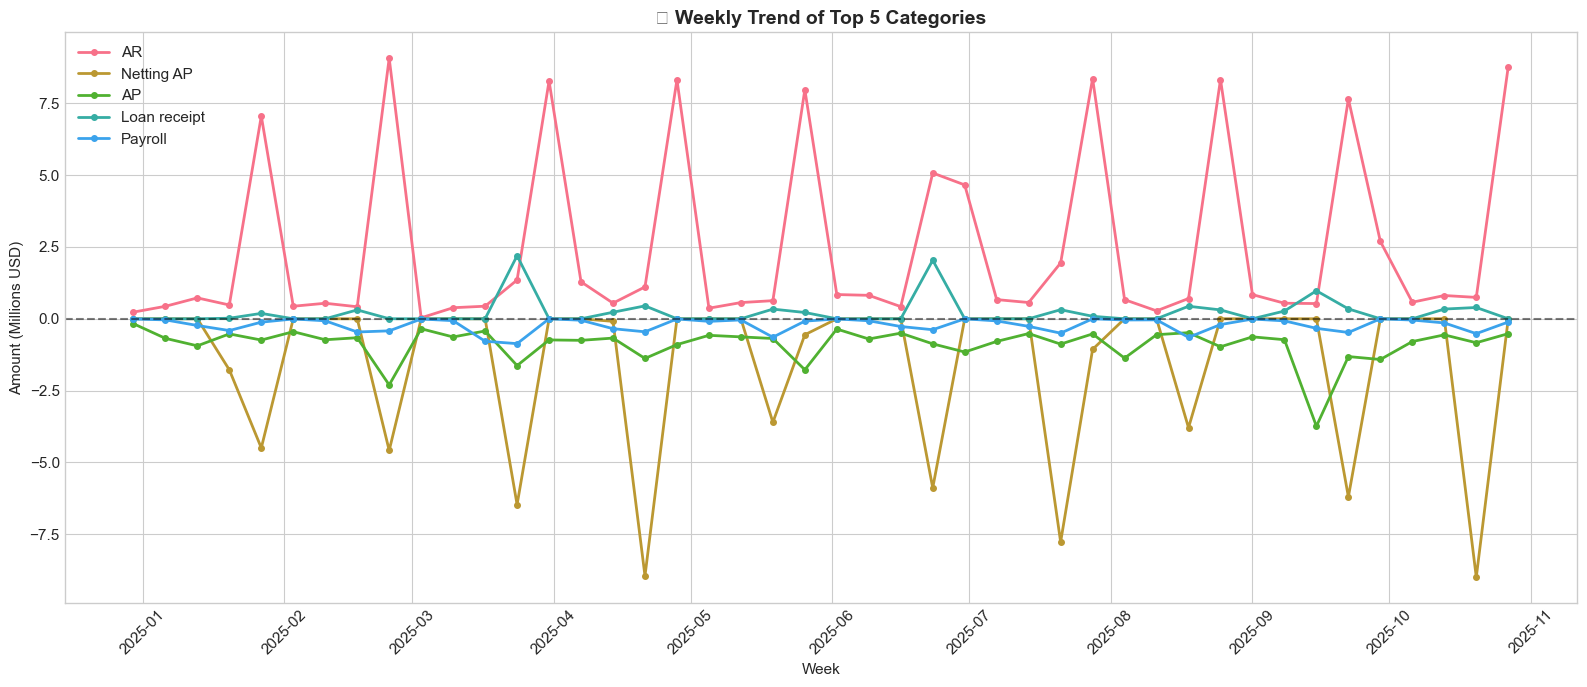

In [9]:
# Top 5 Categories Weekly Trend
top_categories = df.groupby('Category')['Amount in USD'].apply(lambda x: abs(x).sum()).nlargest(5).index.tolist()

fig, ax = plt.subplots(figsize=(16, 7))
for cat in top_categories:
    if cat in weekly_cat.columns:
        ax.plot(weekly_cat['Week_Start'], weekly_cat[cat]/1e6, marker='o', markersize=4, label=cat, linewidth=2)

ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.set_xlabel('Week')
ax.set_ylabel('Amount (Millions USD)')
ax.set_title('📉 Weekly Trend of Top 5 Categories', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('../outputs/04_top_categories_trend.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\4067907562.py:14: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\4067907562.py:14: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\4067907562.py:15: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.savefig('../outputs/05_category_heatmap.png', dpi=150, bbox_inches='tight')
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\4067907562.py:15: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.savefig('../outputs/05_category_heatmap.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Use

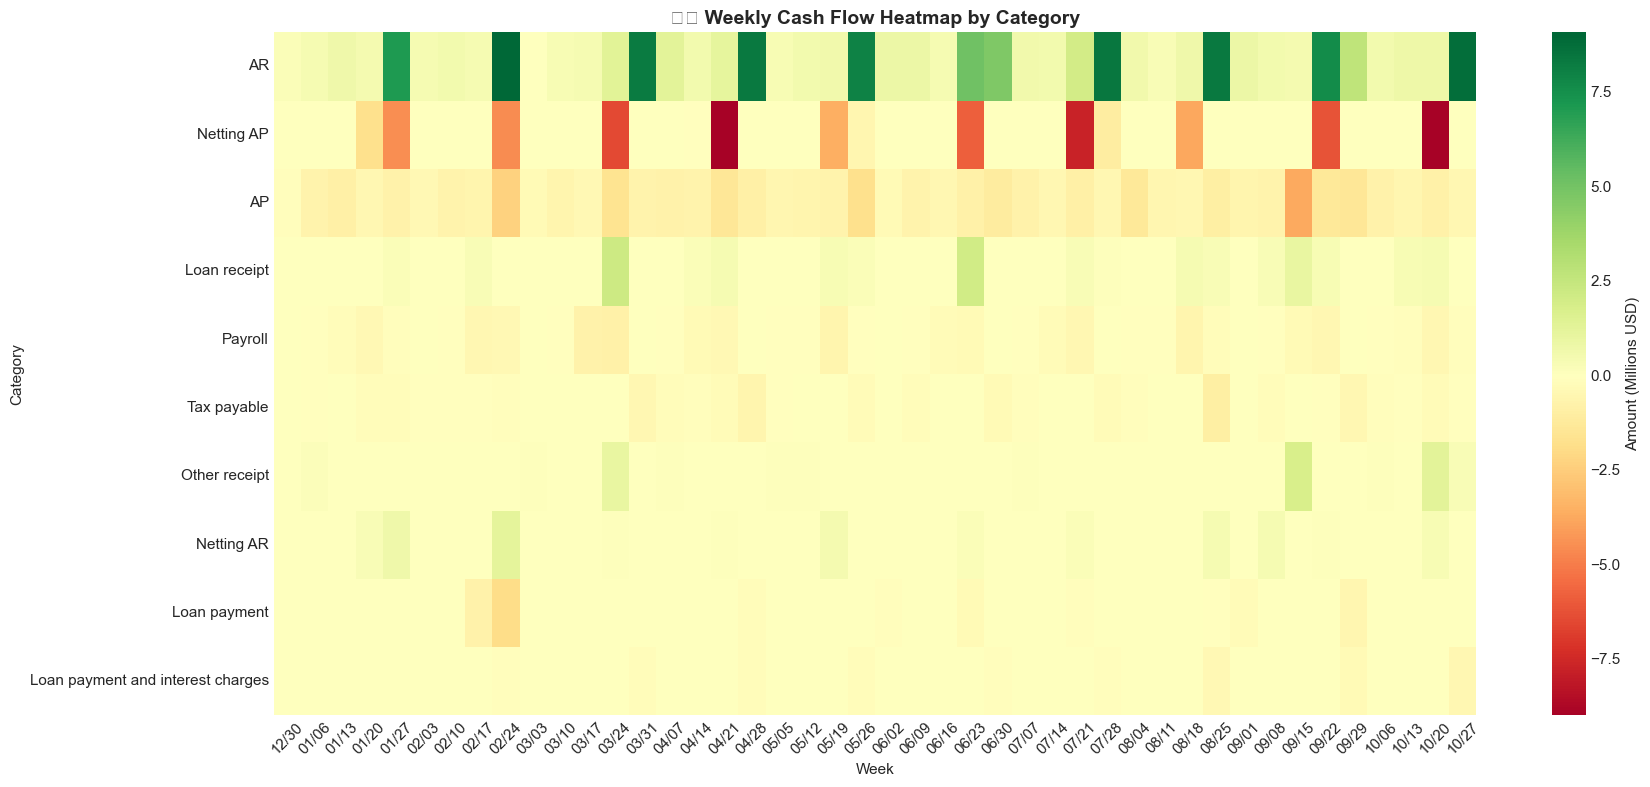

In [10]:
# Category Heatmap (Weekly)
# Get top categories for heatmap
top_cats_heatmap = df.groupby('Category')['Amount in USD'].apply(lambda x: abs(x).sum()).nlargest(10).index.tolist()
heatmap_data = weekly_cat.set_index('Week_Start')[top_cats_heatmap].T / 1e6

fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(heatmap_data, cmap='RdYlGn', center=0, annot=False, 
            xticklabels=[d.strftime('%m/%d') for d in heatmap_data.columns],
            ax=ax, cbar_kws={'label': 'Amount (Millions USD)'})
ax.set_title('🌡️ Weekly Cash Flow Heatmap by Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Week')
ax.set_ylabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/05_category_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 3. 🏢 Entity (Company) Analysis

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\949648482.py:33: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\949648482.py:33: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\949648482.py:34: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  plt.savefig('../outputs/06_entity_comparison.png', dpi=150, bbox_inches='tight')
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\949648482.py:34: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.savefig('../outputs/06_entity_comparison.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\AppD

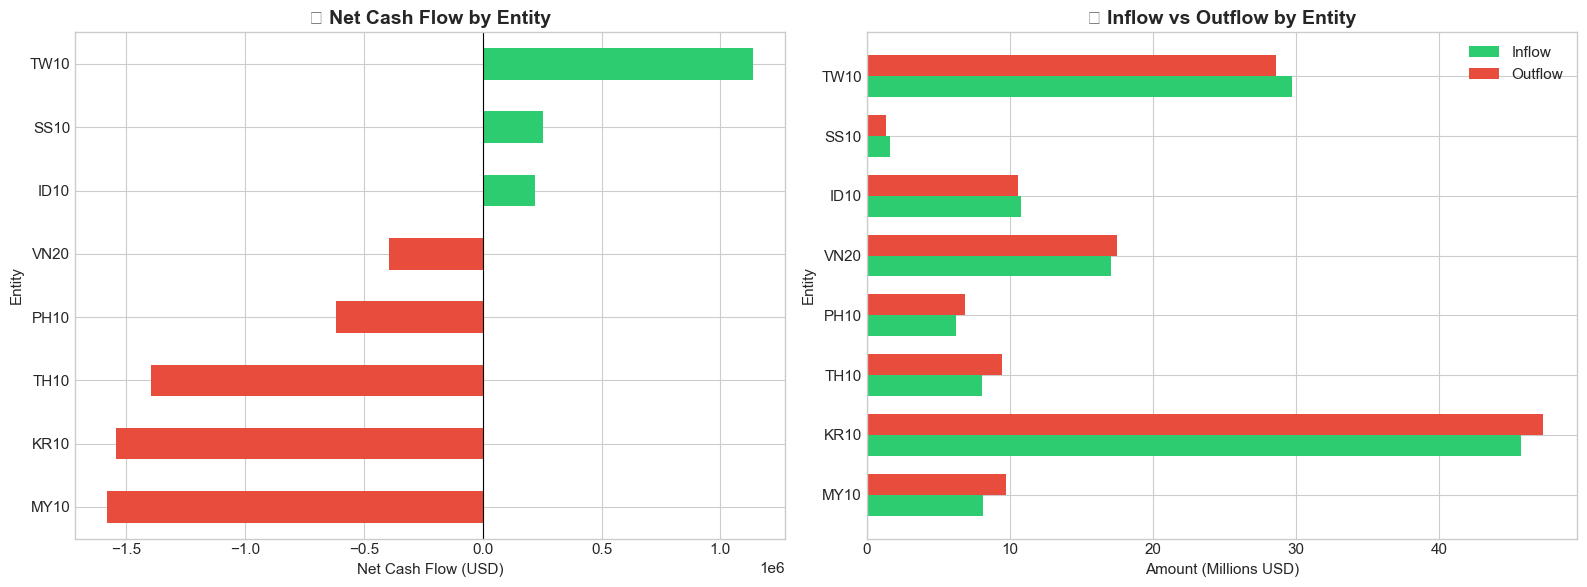

In [11]:
# Total by Entity
entity_totals = df.groupby('Name').agg(
    Total=('Amount in USD', 'sum'),
    Inflow=('Amount in USD', lambda x: x[x > 0].sum()),
    Outflow=('Amount in USD', lambda x: x[x < 0].sum()),
    Count=('Amount in USD', 'count')
).sort_values('Total')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Net Cash Flow by Entity
ax1 = axes[0]
colors = ['#2ecc71' if x >= 0 else '#e74c3c' for x in entity_totals['Total']]
entity_totals['Total'].plot(kind='barh', ax=ax1, color=colors)
ax1.set_xlabel('Net Cash Flow (USD)')
ax1.set_ylabel('Entity')
ax1.set_title('🏢 Net Cash Flow by Entity', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Inflow vs Outflow by Entity
ax2 = axes[1]
x = np.arange(len(entity_totals))
width = 0.35
ax2.barh(x - width/2, entity_totals['Inflow']/1e6, width, label='Inflow', color='#2ecc71')
ax2.barh(x + width/2, entity_totals['Outflow'].abs()/1e6, width, label='Outflow', color='#e74c3c')
ax2.set_yticks(x)
ax2.set_yticklabels(entity_totals.index)
ax2.set_xlabel('Amount (Millions USD)')
ax2.set_ylabel('Entity')
ax2.set_title('💰 Inflow vs Outflow by Entity', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('../outputs/06_entity_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\3416790176.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\3416790176.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig('../outputs/07_entity_weekly_trend.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


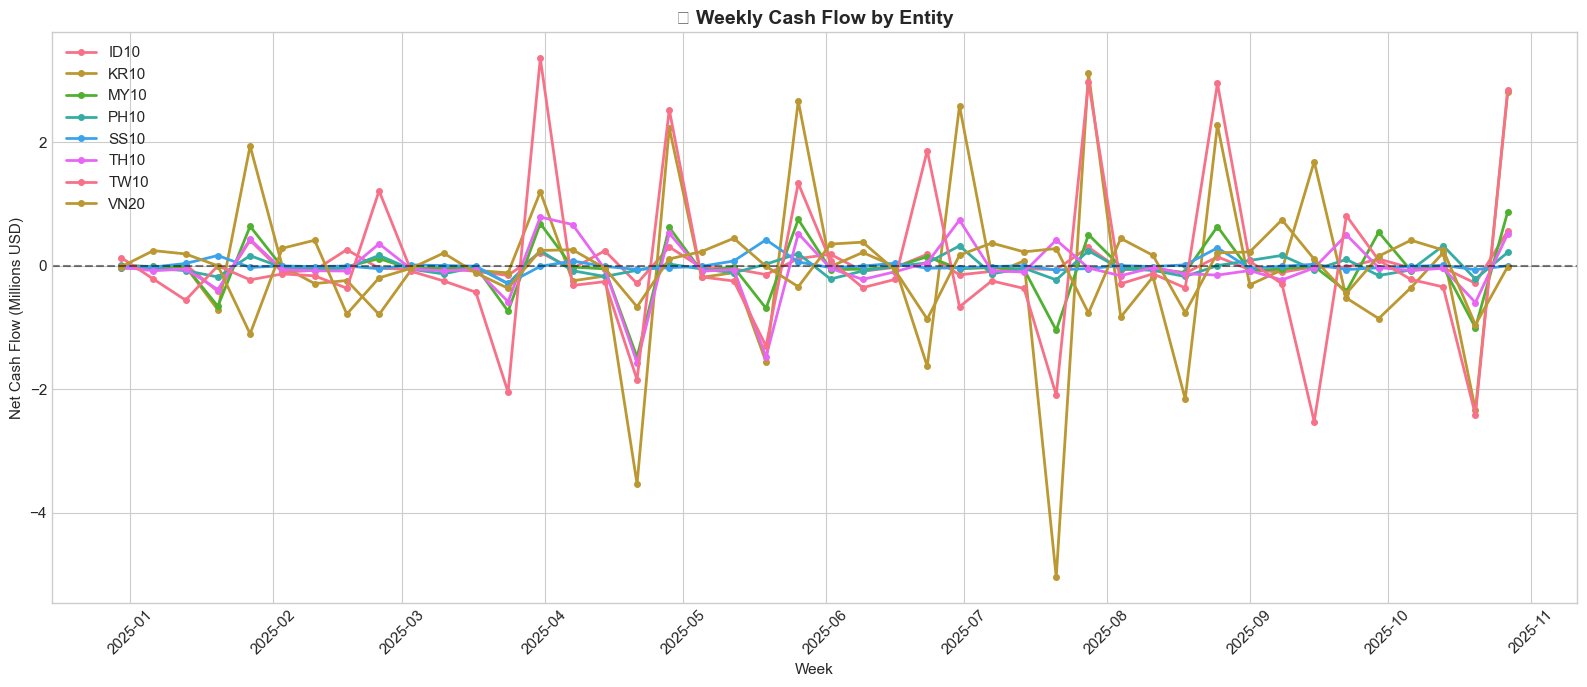

In [12]:
# Entity Weekly Trend
entity_pivot = weekly_entity.pivot_table(index='Week_Start', columns='Name', values='Net_Cashflow', aggfunc='sum').fillna(0)

fig, ax = plt.subplots(figsize=(16, 7))
for entity in entity_pivot.columns:
    ax.plot(entity_pivot.index, entity_pivot[entity]/1e6, marker='o', markersize=4, label=entity, linewidth=2)
    
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.set_xlabel('Week')
ax.set_ylabel('Net Cash Flow (Millions USD)')
ax.set_title('📈 Weekly Cash Flow by Entity', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('../outputs/07_entity_weekly_trend.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1826022622.py:12: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1826022622.py:12: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1826022622.py:13: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.savefig('../outputs/08_entity_heatmap.png', dpi=150, bbox_inches='tight')
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1826022622.py:13: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.savefig('../outputs/08_entity_heatmap.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\a

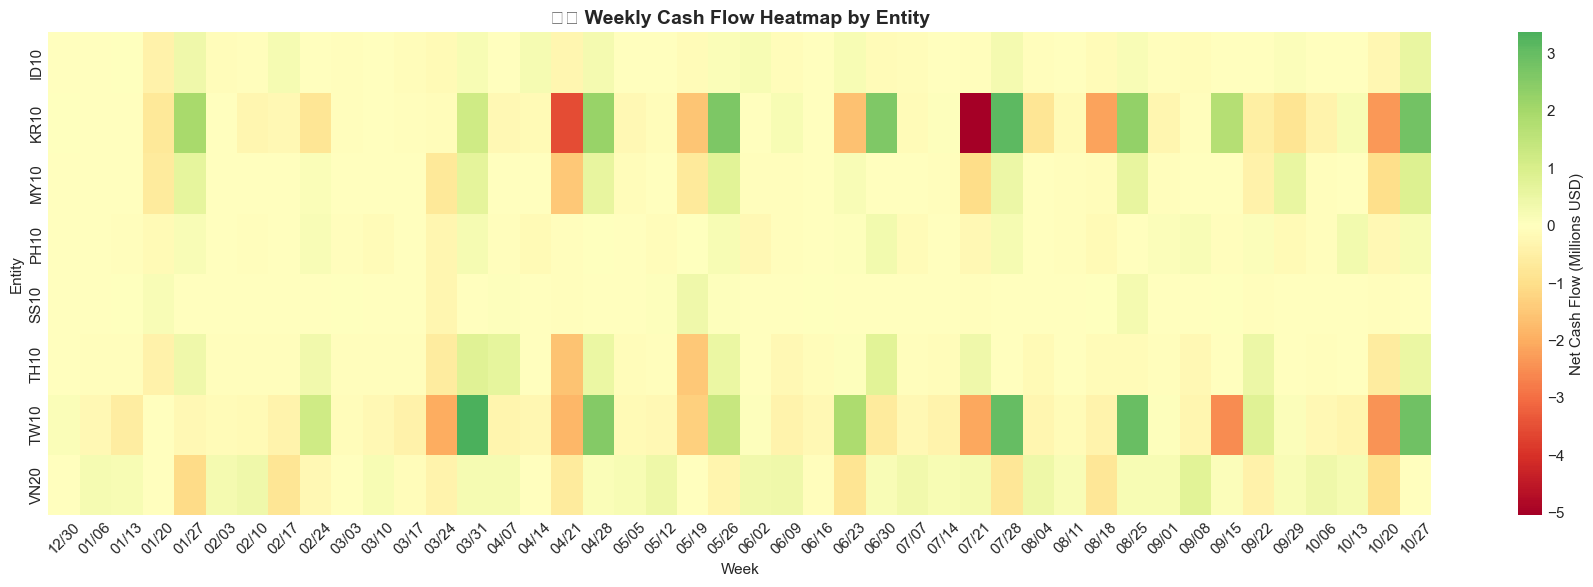

In [13]:
# Entity Heatmap
entity_heatmap = entity_pivot.T / 1e6

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(entity_heatmap, cmap='RdYlGn', center=0, annot=False,
            xticklabels=[d.strftime('%m/%d') for d in entity_heatmap.columns],
            ax=ax, cbar_kws={'label': 'Net Cash Flow (Millions USD)'})
ax.set_title('🌡️ Weekly Cash Flow Heatmap by Entity', fontsize=14, fontweight='bold')
ax.set_xlabel('Week')
ax.set_ylabel('Entity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/08_entity_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 4. 📅 Monthly & Periodic Patterns

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1024607419.py:40: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1024607419.py:40: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1024607419.py:41: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.savefig('../outputs/09_monthly_summary.png', dpi=150, bbox_inches='tight')
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1024607419.py:41: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.savefig('../outputs/09_monthly_summary.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\AppData\Local\Programs\Py

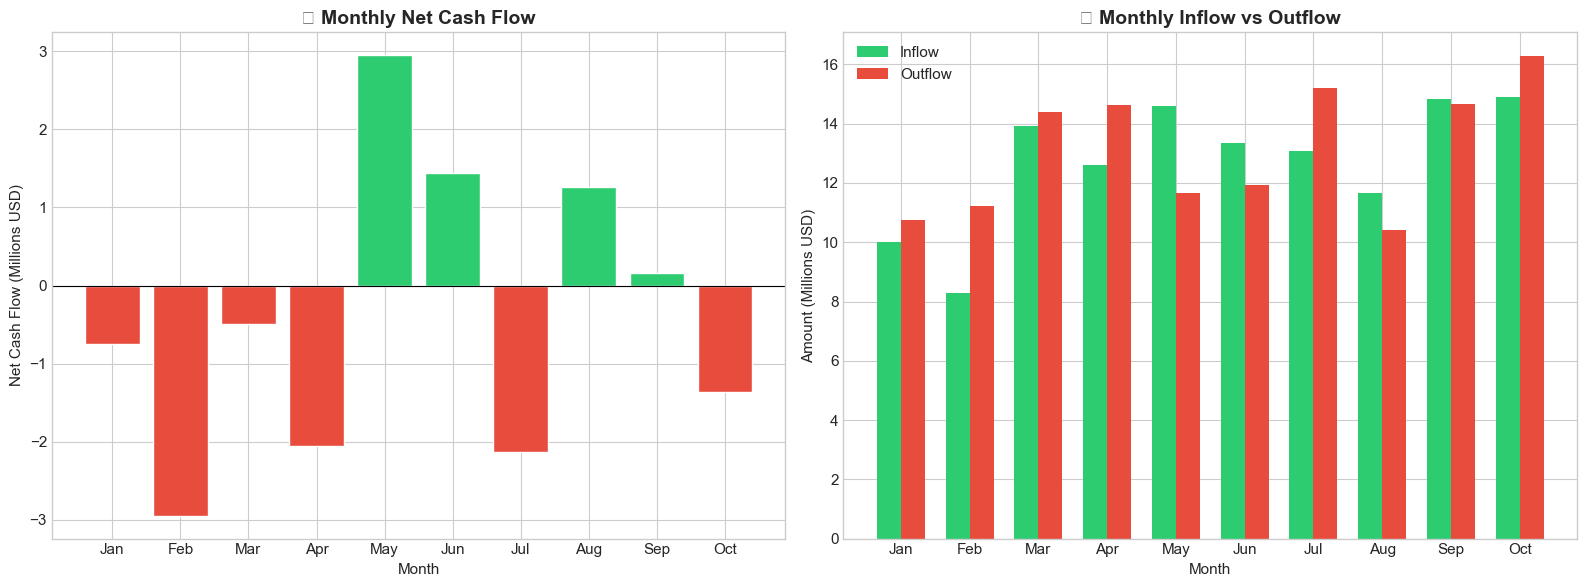

In [14]:
# Monthly Summary
df['Month_Name'] = pd.to_datetime(df['Pstng Date']).dt.month_name()
df['Month_Num'] = pd.to_datetime(df['Pstng Date']).dt.month

monthly = df.groupby('Month_Num').agg(
    Net=('Amount in USD', 'sum'),
    Inflow=('Amount in USD', lambda x: x[x > 0].sum()),
    Outflow=('Amount in USD', lambda x: x[x < 0].sum()),
    Count=('Amount in USD', 'count')
).reset_index()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Monthly Net Cash Flow
ax1 = axes[0]
colors = ['#2ecc71' if x >= 0 else '#e74c3c' for x in monthly['Net']]
ax1.bar(monthly['Month_Num'], monthly['Net']/1e6, color=colors, edgecolor='white')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax1.set_xticks(monthly['Month_Num'])
ax1.set_xticklabels(month_labels)
ax1.set_xlabel('Month')
ax1.set_ylabel('Net Cash Flow (Millions USD)')
ax1.set_title('📅 Monthly Net Cash Flow', fontsize=14, fontweight='bold')

# Inflow vs Outflow
ax2 = axes[1]
x = np.arange(len(monthly))
width = 0.35
ax2.bar(x - width/2, monthly['Inflow']/1e6, width, label='Inflow', color='#2ecc71')
ax2.bar(x + width/2, monthly['Outflow'].abs()/1e6, width, label='Outflow', color='#e74c3c')
ax2.set_xticks(x)
ax2.set_xticklabels(month_labels)
ax2.set_xlabel('Month')
ax2.set_ylabel('Amount (Millions USD)')
ax2.set_title('💰 Monthly Inflow vs Outflow', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('../outputs/09_monthly_summary.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1258102699.py:13: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1258102699.py:14: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  plt.savefig('../outputs/10_week_of_month_pattern.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


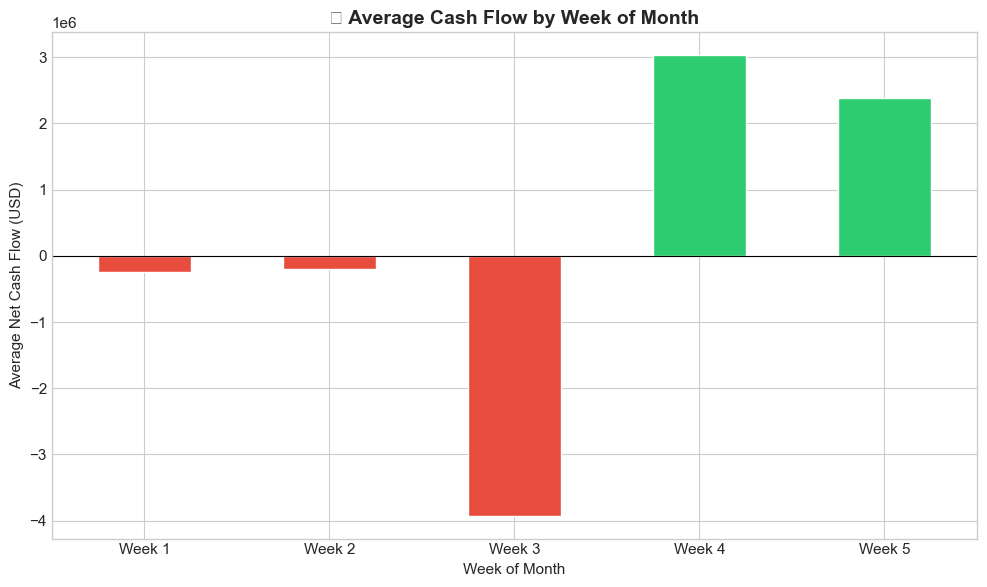

In [15]:
# Week of Month Pattern
weekly['Week_of_Month'] = ((weekly['Week_Start'].dt.day - 1) // 7) + 1
week_pattern = weekly.groupby('Week_of_Month')['Net_Cashflow'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#2ecc71' if x >= 0 else '#e74c3c' for x in week_pattern]
week_pattern.plot(kind='bar', ax=ax, color=colors, edgecolor='white')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.set_xlabel('Week of Month')
ax.set_ylabel('Average Net Cash Flow (USD)')
ax.set_title('📆 Average Cash Flow by Week of Month', fontsize=14, fontweight='bold')
ax.set_xticklabels(['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'], rotation=0)
plt.tight_layout()
plt.savefig('../outputs/10_week_of_month_pattern.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 5. 📊 Distribution Analysis

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\168640412.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\168640412.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig('../outputs/11_amount_distribution.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


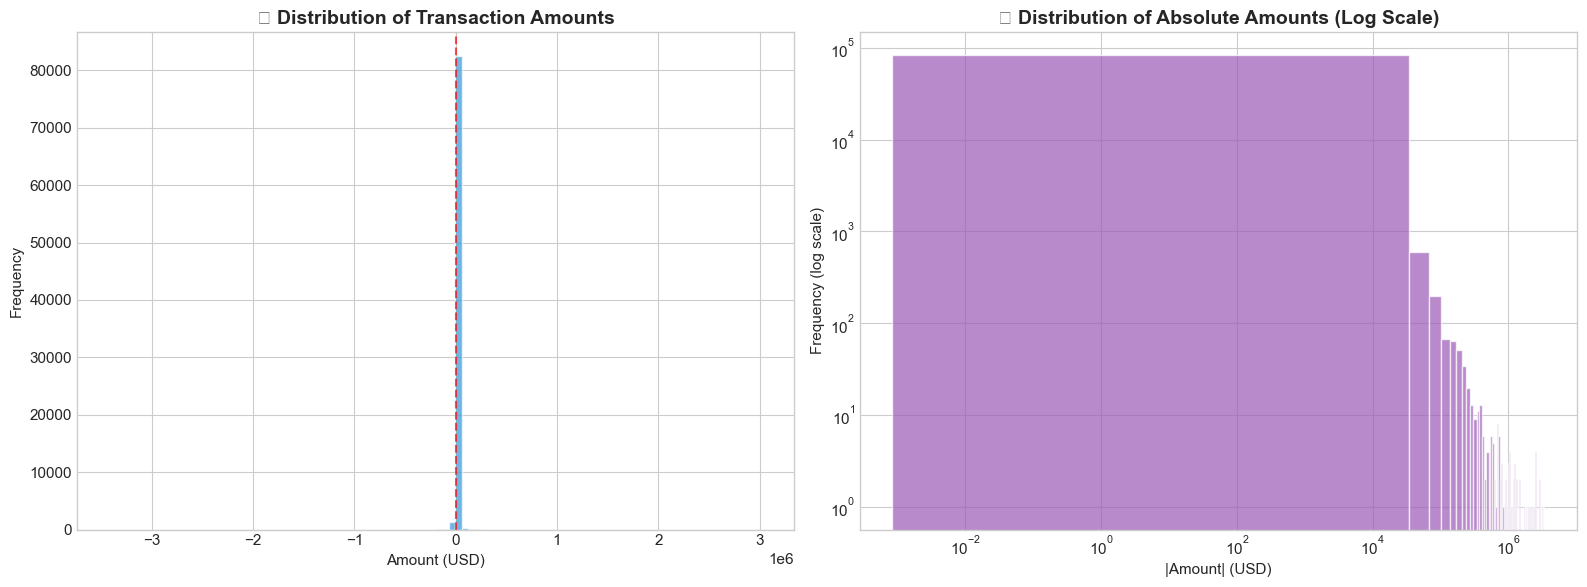

In [16]:
# Distribution of Transaction Amounts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# All transactions (log scale due to large range)
ax1 = axes[0]
ax1.hist(df['Amount in USD'], bins=100, color='#3498db', alpha=0.7, edgecolor='white')
ax1.set_xlabel('Amount (USD)')
ax1.set_ylabel('Frequency')
ax1.set_title('📊 Distribution of Transaction Amounts', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.7)

# Log-scaled
ax2 = axes[1]
ax2.hist(df[df['Amount in USD'] != 0]['Amount in USD'].abs(), bins=100, color='#9b59b6', alpha=0.7, edgecolor='white', log=True)
ax2.set_xlabel('|Amount| (USD)')
ax2.set_ylabel('Frequency (log scale)')
ax2.set_title('📊 Distribution of Absolute Amounts (Log Scale)', fontsize=14, fontweight='bold')
ax2.set_xscale('log')

plt.tight_layout()
plt.savefig('../outputs/11_amount_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2366817495.py:11: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2366817495.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig('../outputs/12_boxplot_by_category.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


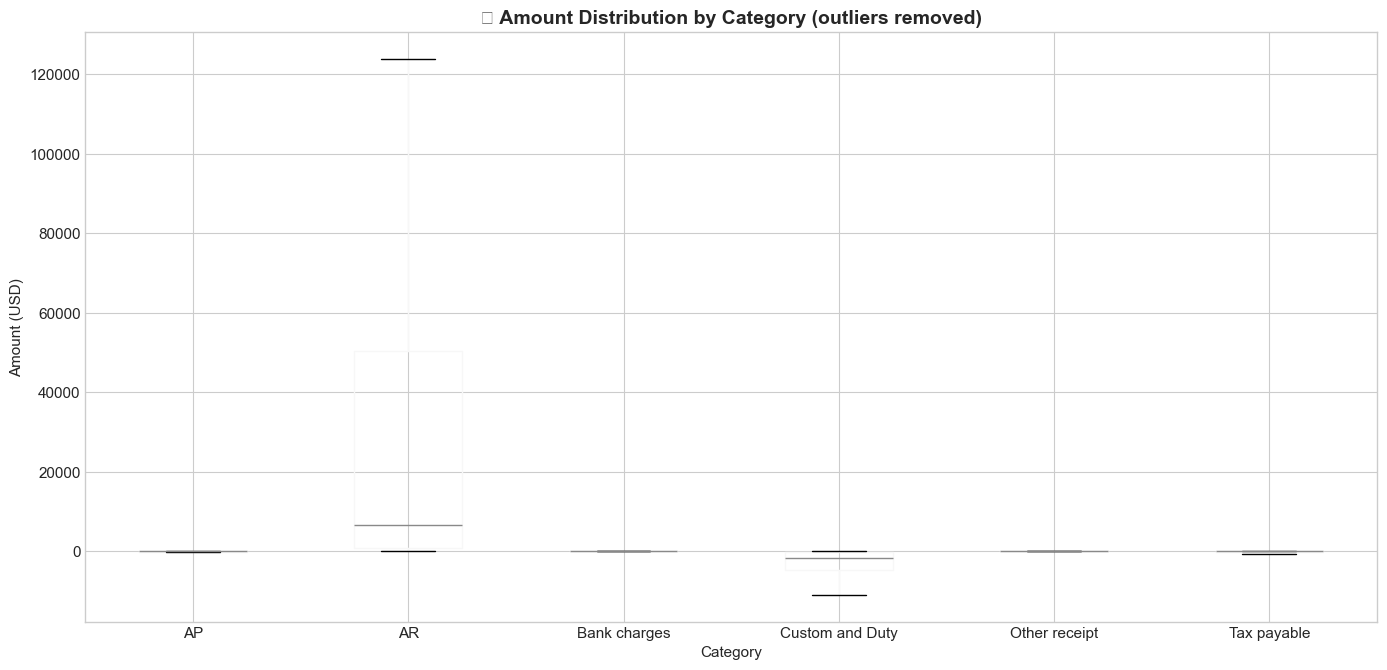

In [17]:
# Box plots by Category
top_cats = df.groupby('Category')['Amount in USD'].count().nlargest(6).index.tolist()
df_top = df[df['Category'].isin(top_cats)]

fig, ax = plt.subplots(figsize=(14, 7))
df_top.boxplot(column='Amount in USD', by='Category', ax=ax, showfliers=False)
ax.set_xlabel('Category')
ax.set_ylabel('Amount (USD)')
ax.set_title('📦 Amount Distribution by Category (outliers removed)', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.tight_layout()
plt.savefig('../outputs/12_boxplot_by_category.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2802174521.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2802174521.py:23: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2802174521.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig('../outputs/13_weekly_distribution.png', dpi=150, bbox_inches='tight')
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\2802174521.py:24: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) Arial.
  plt.savefig('../outputs/13_weekly_distribution.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\asus\AppData\Local\Progra

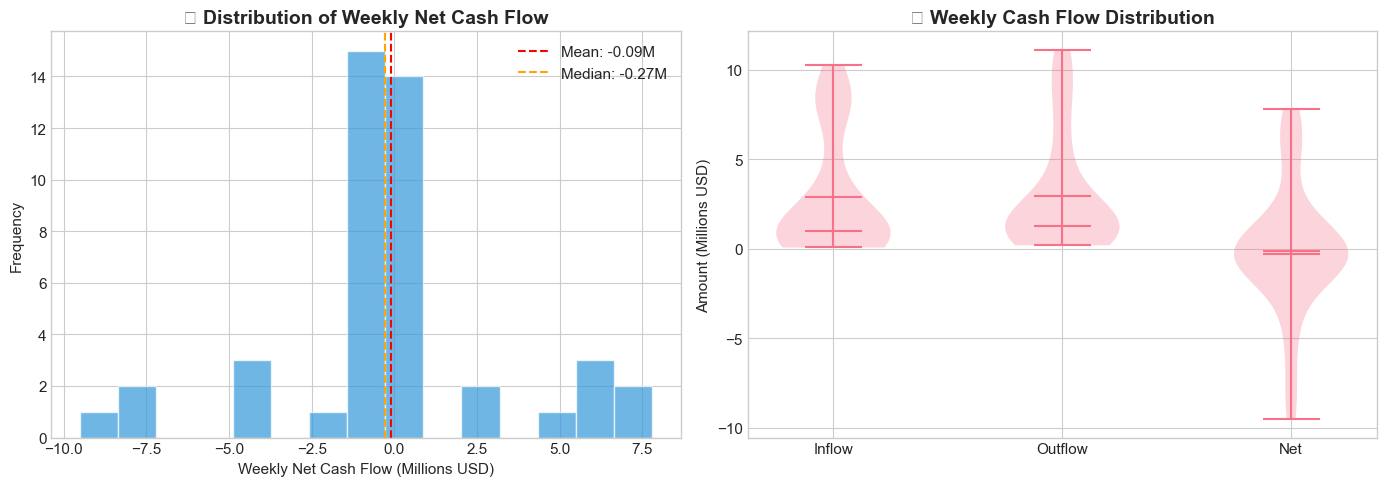

In [18]:
# Weekly Net Cash Flow Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1 = axes[0]
ax1.hist(weekly['Net_Cashflow']/1e6, bins=15, color='#3498db', alpha=0.7, edgecolor='white')
ax1.axvline(x=weekly['Net_Cashflow'].mean()/1e6, color='red', linestyle='--', label=f'Mean: {weekly["Net_Cashflow"].mean()/1e6:.2f}M')
ax1.axvline(x=weekly['Net_Cashflow'].median()/1e6, color='orange', linestyle='--', label=f'Median: {weekly["Net_Cashflow"].median()/1e6:.2f}M')
ax1.set_xlabel('Weekly Net Cash Flow (Millions USD)')
ax1.set_ylabel('Frequency')
ax1.set_title('📊 Distribution of Weekly Net Cash Flow', fontsize=14, fontweight='bold')
ax1.legend()

# Violin plot
ax2 = axes[1]
violin = ax2.violinplot([weekly['Inflow']/1e6, weekly['Outflow'].abs()/1e6, weekly['Net_Cashflow']/1e6], 
                         showmeans=True, showmedians=True)
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Inflow', 'Outflow', 'Net'])
ax2.set_ylabel('Amount (Millions USD)')
ax2.set_title('🎻 Weekly Cash Flow Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/13_weekly_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 6. 🔗 Correlation Analysis

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\44924628.py:15: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\44924628.py:16: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.savefig('../outputs/14_inflow_outflow_correlation.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


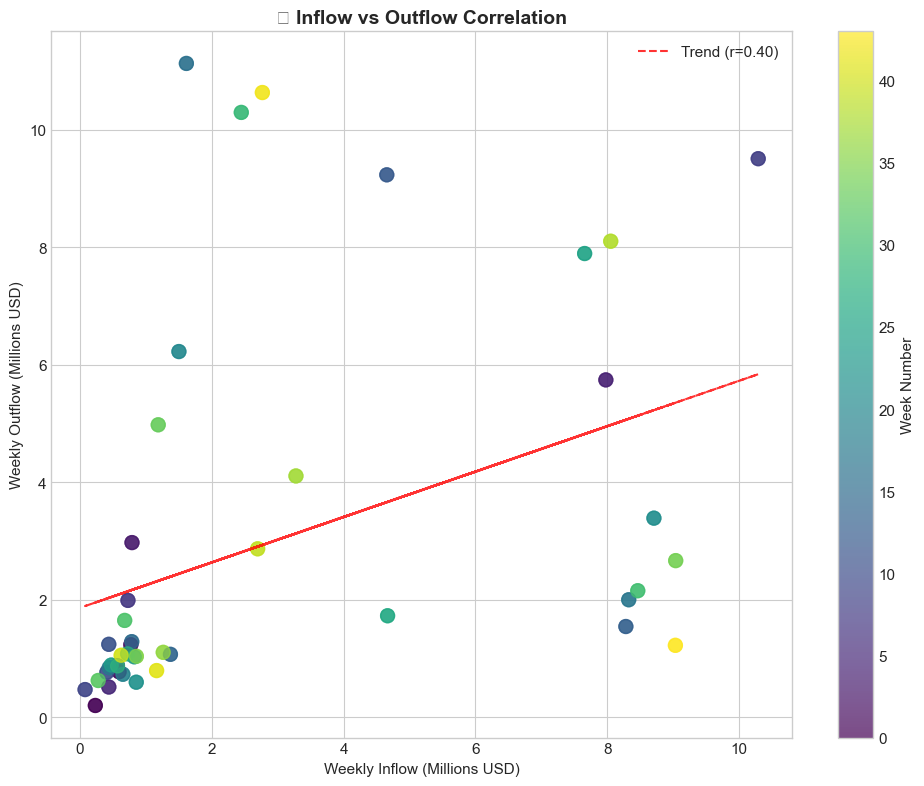

In [19]:
# Correlation between Inflow and Outflow
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(weekly['Inflow']/1e6, weekly['Outflow'].abs()/1e6, s=100, c=range(len(weekly)), cmap='viridis', alpha=0.7)

# Add regression line
z = np.polyfit(weekly['Inflow']/1e6, weekly['Outflow'].abs()/1e6, 1)
p = np.poly1d(z)
ax.plot(weekly['Inflow']/1e6, p(weekly['Inflow']/1e6), 'r--', alpha=0.8, label=f'Trend (r={np.corrcoef(weekly["Inflow"], weekly["Outflow"].abs())[0,1]:.2f})')

ax.set_xlabel('Weekly Inflow (Millions USD)')
ax.set_ylabel('Weekly Outflow (Millions USD)')
ax.set_title('🔗 Inflow vs Outflow Correlation', fontsize=14, fontweight='bold')
ax.legend()
plt.colorbar(ax.scatter(weekly['Inflow']/1e6, weekly['Outflow'].abs()/1e6, s=100, c=range(len(weekly)), cmap='viridis', alpha=0.7), label='Week Number')
plt.tight_layout()
plt.savefig('../outputs/14_inflow_outflow_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\691233796.py:9: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\691233796.py:10: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.savefig('../outputs/15_category_correlation.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


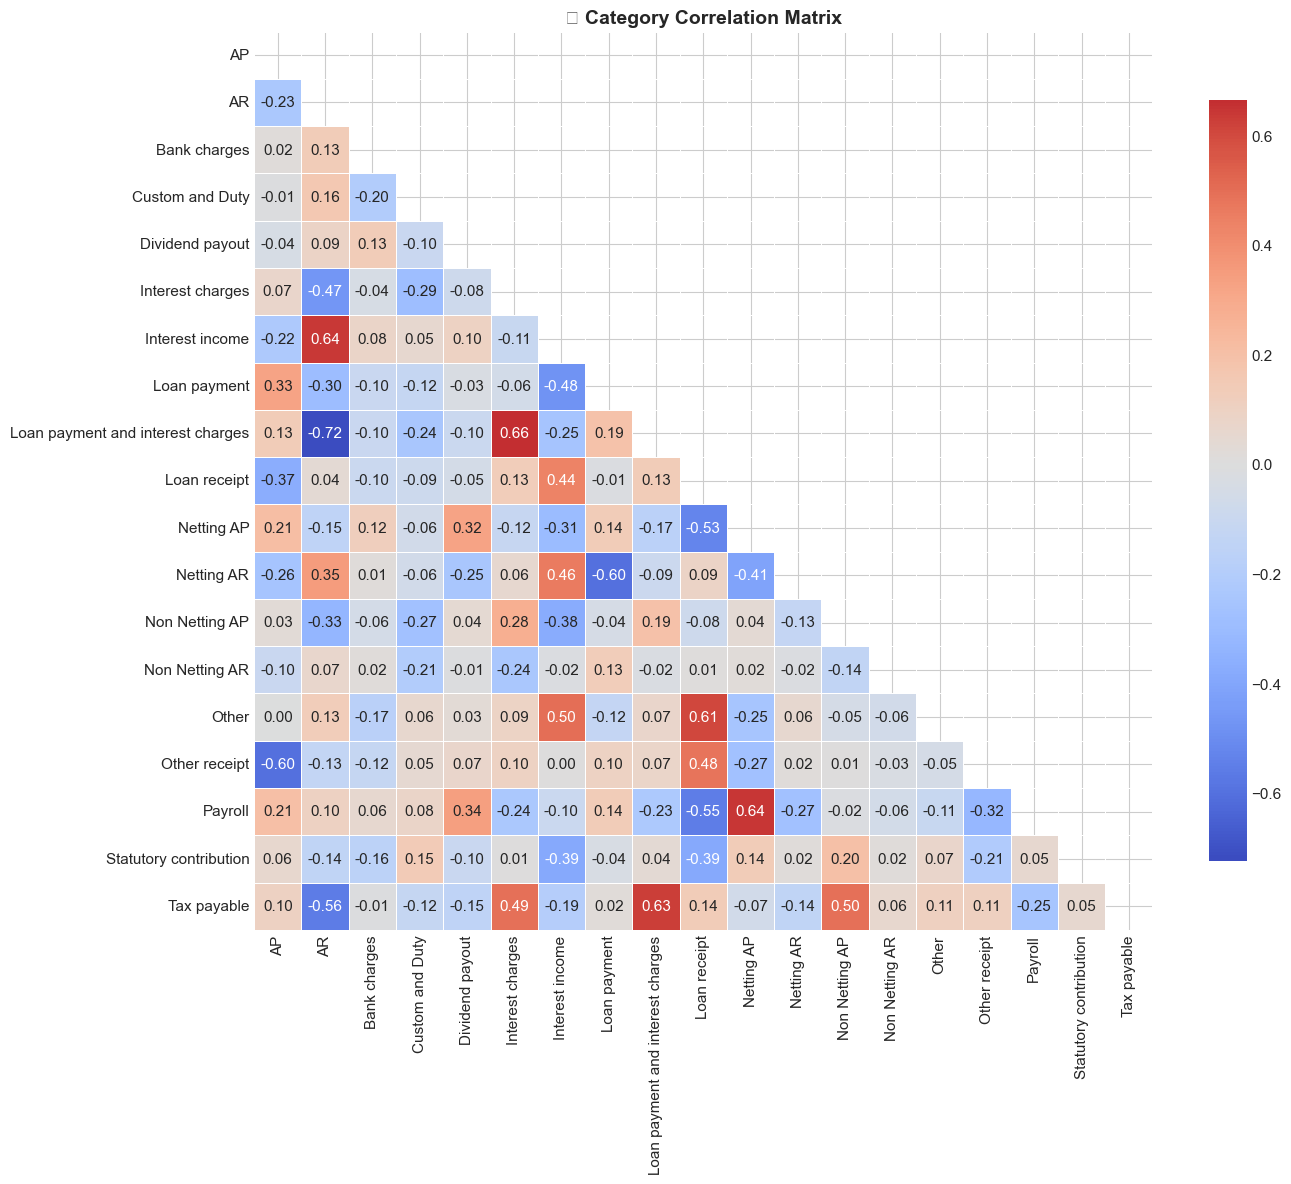

In [20]:
# Category Correlation Matrix
cat_corr = weekly_cat.set_index('Week_Start').corr()

fig, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(cat_corr, dtype=bool))
sns.heatmap(cat_corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
ax.set_title('🔗 Category Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/15_category_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 7. 🚨 Volatility & Anomaly Detection

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1013397393.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1013397393.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1013397393.py:41: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig('../outputs/16_volatility_anomalies.png', dpi=150, bbox_inches='tight')
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1013397393.py:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig('../outputs/16_volatility_anomalies.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figu

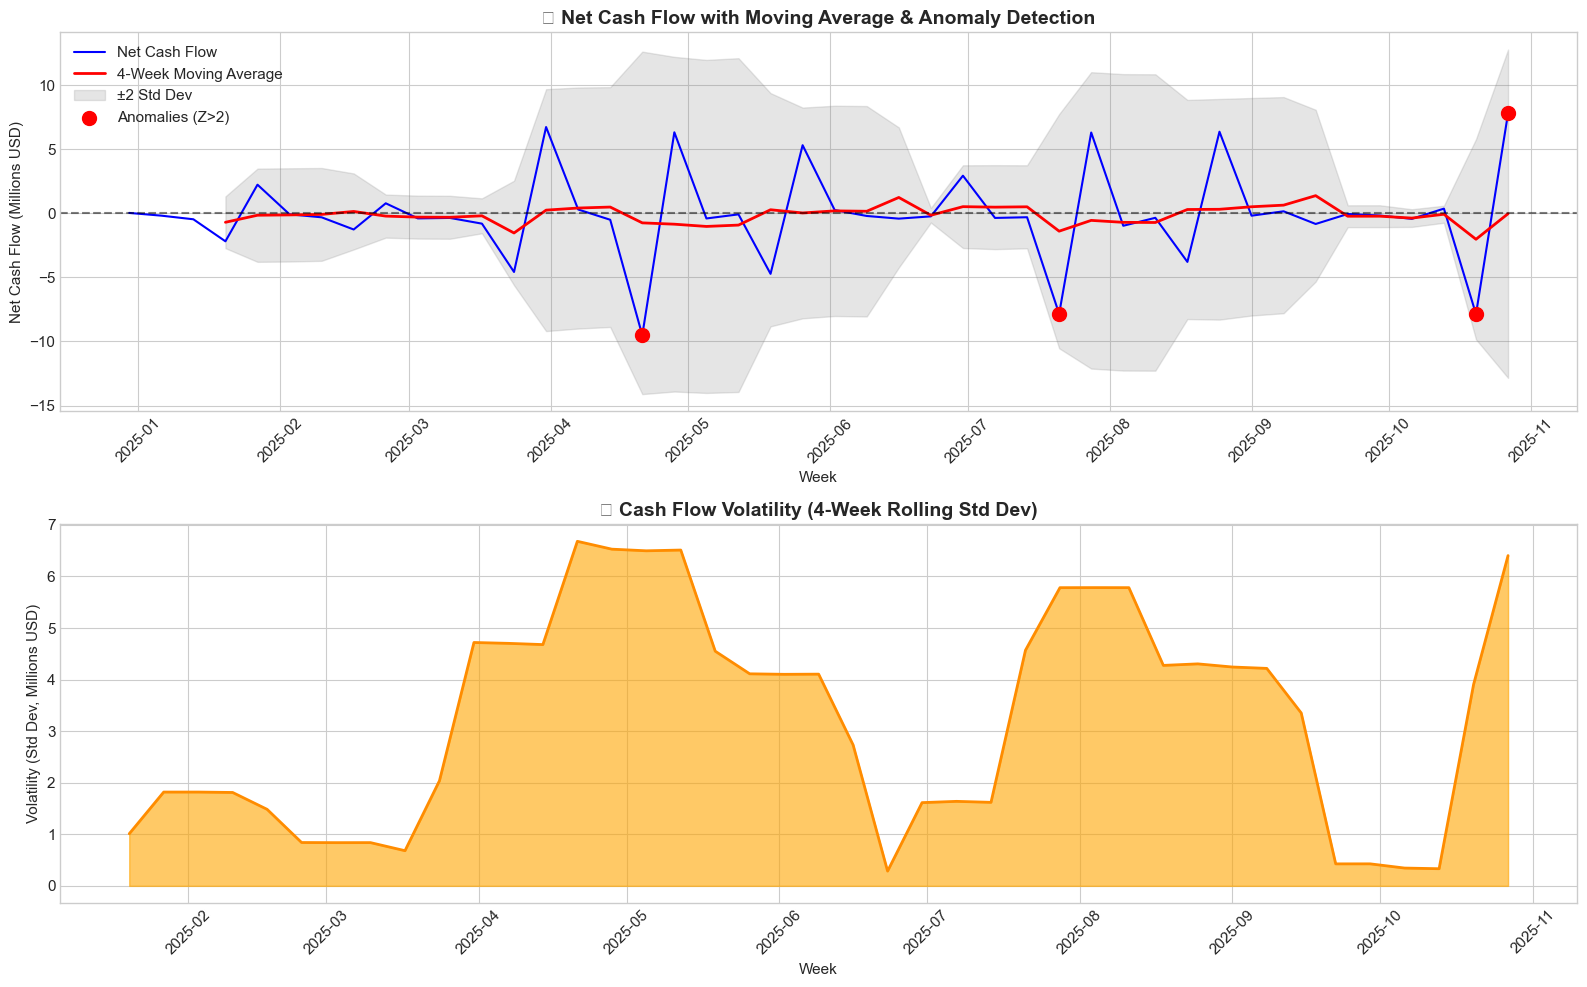


🚨 Detected Anomalies:
   Week_Start  Net_Cashflow   Z_Score
16 2025-04-21 -9.510155e+06 -2.631926
29 2025-07-21 -7.844089e+06 -2.166486
42 2025-10-20 -7.862844e+06 -2.171726
43 2025-10-27  7.805282e+06  2.205390


In [21]:
# Rolling statistics
weekly['Rolling_Mean_4'] = weekly['Net_Cashflow'].rolling(window=4).mean()
weekly['Rolling_Std_4'] = weekly['Net_Cashflow'].rolling(window=4).std()

# Z-score for anomaly detection
weekly['Z_Score'] = (weekly['Net_Cashflow'] - weekly['Net_Cashflow'].mean()) / weekly['Net_Cashflow'].std()
weekly['Is_Anomaly'] = abs(weekly['Z_Score']) > 2

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Net Cash Flow with Rolling Mean and Bollinger-like bands
ax1 = axes[0]
ax1.plot(weekly['Week_Start'], weekly['Net_Cashflow']/1e6, 'b-', linewidth=1.5, label='Net Cash Flow')
ax1.plot(weekly['Week_Start'], weekly['Rolling_Mean_4']/1e6, 'r-', linewidth=2, label='4-Week Moving Average')
ax1.fill_between(weekly['Week_Start'], 
                  (weekly['Rolling_Mean_4'] - 2*weekly['Rolling_Std_4'])/1e6,
                  (weekly['Rolling_Mean_4'] + 2*weekly['Rolling_Std_4'])/1e6,
                  alpha=0.2, color='gray', label='±2 Std Dev')

# Mark anomalies
anomalies = weekly[weekly['Is_Anomaly']]
ax1.scatter(anomalies['Week_Start'], anomalies['Net_Cashflow']/1e6, color='red', s=100, zorder=5, label='Anomalies (Z>2)')

ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_xlabel('Week')
ax1.set_ylabel('Net Cash Flow (Millions USD)')
ax1.set_title('📈 Net Cash Flow with Moving Average & Anomaly Detection', fontsize=14, fontweight='bold')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Volatility (Rolling Std)
ax2 = axes[1]
ax2.fill_between(weekly['Week_Start'], weekly['Rolling_Std_4']/1e6, alpha=0.6, color='orange')
ax2.plot(weekly['Week_Start'], weekly['Rolling_Std_4']/1e6, 'darkorange', linewidth=2)
ax2.set_xlabel('Week')
ax2.set_ylabel('Volatility (Std Dev, Millions USD)')
ax2.set_title('📊 Cash Flow Volatility (4-Week Rolling Std Dev)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../outputs/16_volatility_anomalies.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n🚨 Detected Anomalies:")
print(anomalies[['Week_Start', 'Net_Cashflow', 'Z_Score']])

---
## 8. 🎯 Transaction Size Analysis

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1655221659.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_summary = df.groupby('Size_Bucket').agg(
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1655221659.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1655221659.py:32: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1655221659.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig('../outputs/17_transaction_size.png', dpi=150, bbox_inches='tight')
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\1655221659.py:33: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing fro

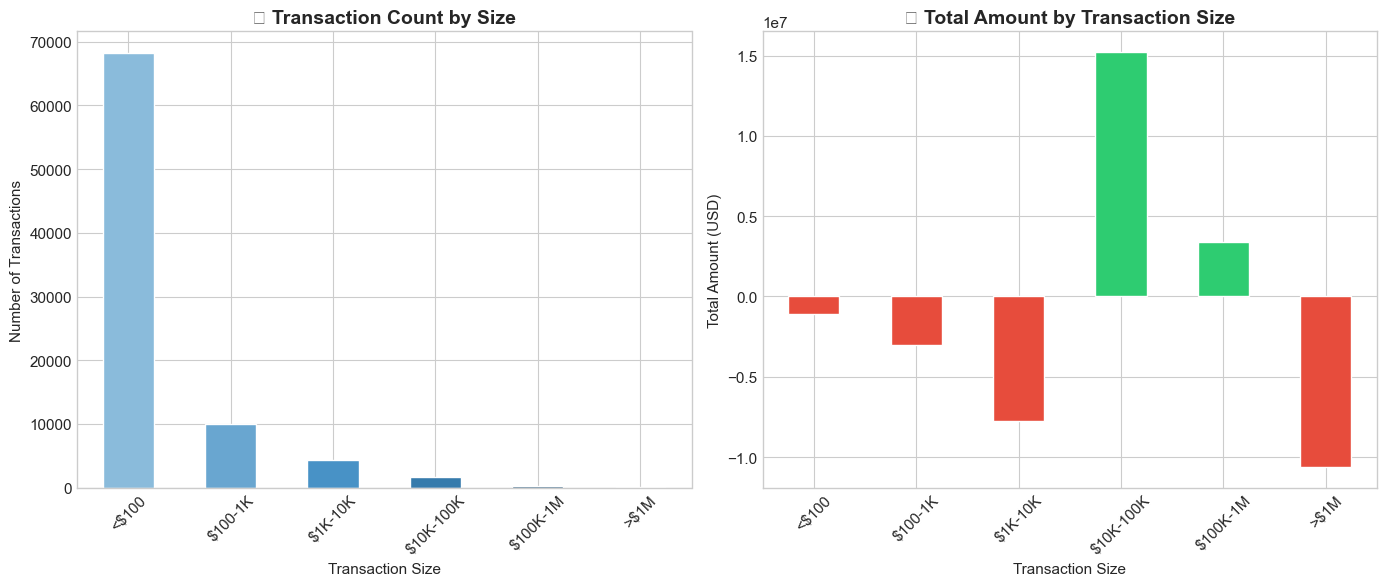

In [22]:
# Transaction size buckets
df['Amount_Abs'] = df['Amount in USD'].abs()
df['Size_Bucket'] = pd.cut(df['Amount_Abs'], 
                           bins=[0, 100, 1000, 10000, 100000, 1000000, float('inf')],
                           labels=['<$100', '$100-1K', '$1K-10K', '$10K-100K', '$100K-1M', '>$1M'])

size_summary = df.groupby('Size_Bucket').agg(
    Count=('Amount in USD', 'count'),
    Total=('Amount in USD', 'sum'),
    Avg=('Amount_Abs', 'mean')
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Transaction count by size
ax1 = axes[0]
size_summary['Count'].plot(kind='bar', ax=ax1, color=sns.color_palette('Blues_d', len(size_summary)), edgecolor='white')
ax1.set_xlabel('Transaction Size')
ax1.set_ylabel('Number of Transactions')
ax1.set_title('📊 Transaction Count by Size', fontsize=14, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Total amount by size
ax2 = axes[1]
colors = ['#2ecc71' if x >= 0 else '#e74c3c' for x in size_summary['Total']]
size_summary['Total'].plot(kind='bar', ax=ax2, color=colors, edgecolor='white')
ax2.set_xlabel('Transaction Size')
ax2.set_ylabel('Total Amount (USD)')
ax2.set_title('💰 Total Amount by Transaction Size', fontsize=14, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('../outputs/17_transaction_size.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 9. 🌐 Entity-Category Relationship

C:\Users\asus\AppData\Local\Temp\ipykernel_9736\4056105244.py:11: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\AppData\Local\Temp\ipykernel_9736\4056105244.py:12: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) Arial.
  plt.savefig('../outputs/18_entity_category_heatmap.png', dpi=150, bbox_inches='tight')
c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


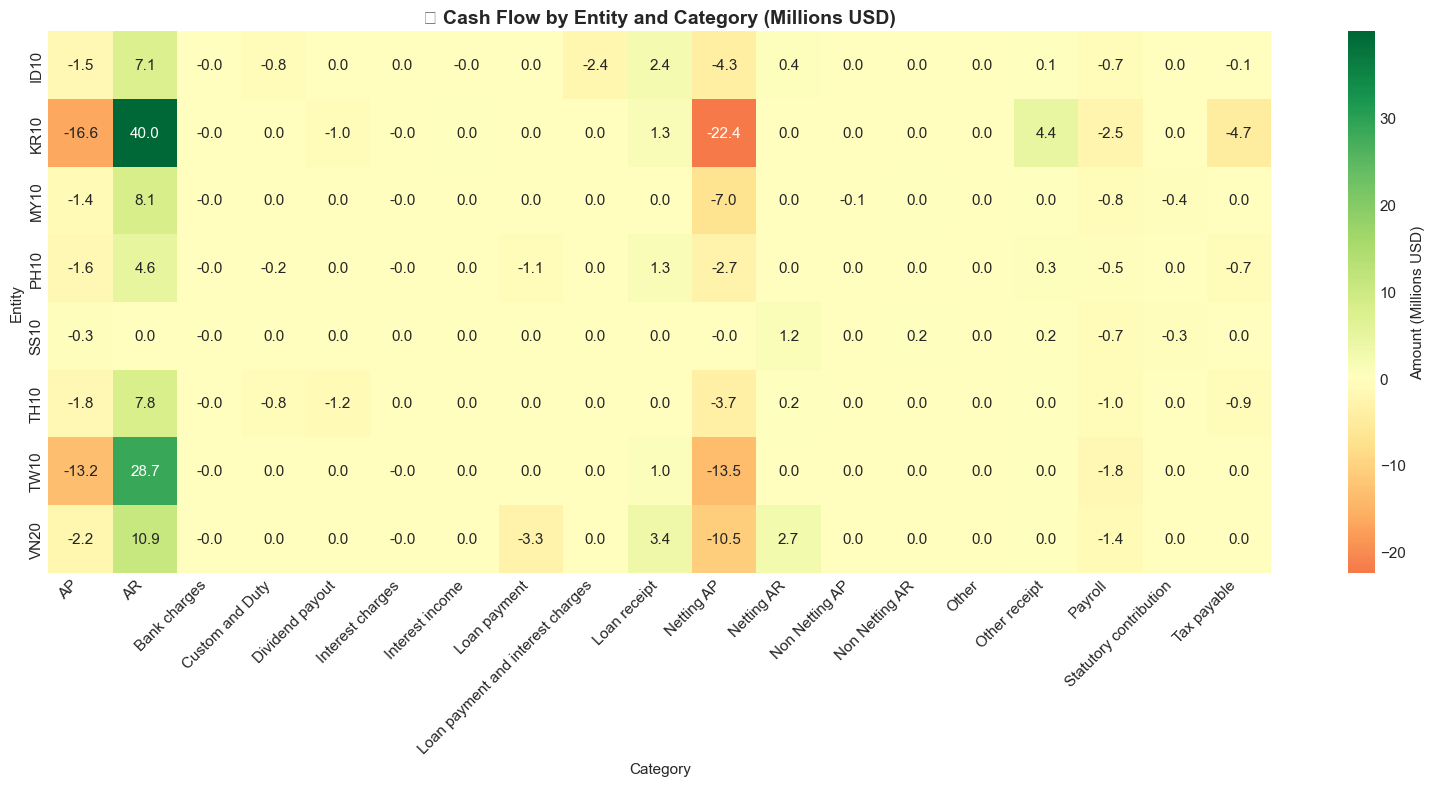

In [23]:
# Entity-Category heatmap
entity_cat = df.groupby(['Name', 'Category'])['Amount in USD'].sum().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(entity_cat/1e6, cmap='RdYlGn', center=0, annot=True, fmt='.1f', ax=ax,
            cbar_kws={'label': 'Amount (Millions USD)'})
ax.set_title('🌐 Cash Flow by Entity and Category (Millions USD)', fontsize=14, fontweight='bold')
ax.set_xlabel('Category')
ax.set_ylabel('Entity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../outputs/18_entity_category_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 📋 Key Insights Summary

In [24]:
print("="*60)
print("📋 KEY INSIGHTS SUMMARY")
print("="*60)

print(f"\n📊 Overall Cash Flow:")
print(f"   • Total Net Cash Flow: ${weekly['Net_Cashflow'].sum():,.2f}")
print(f"   • Total Inflow: ${weekly['Inflow'].sum():,.2f}")
print(f"   • Total Outflow: ${weekly['Outflow'].abs().sum():,.2f}")
print(f"   • Average Weekly Net: ${weekly['Net_Cashflow'].mean():,.2f}")

print(f"\n📈 Trend:")
trend = 'Positive' if z[0] > 0 else 'Negative'
print(f"   • Overall trend: {trend}")
print(f"   • Positive weeks: {(weekly['Net_Cashflow'] > 0).sum()} / {len(weekly)}")
print(f"   • Negative weeks: {(weekly['Net_Cashflow'] < 0).sum()} / {len(weekly)}")

print(f"\n🏢 Top Entity by Volume:")
top_entity = df.groupby('Name')['Amount_Abs'].sum().idxmax()
print(f"   • {top_entity}: ${df[df['Name']==top_entity]['Amount_Abs'].sum():,.2f}")

print(f"\n🏷️ Top Category by Volume:")
top_cat = df.groupby('Category')['Amount_Abs'].sum().idxmax()
print(f"   • {top_cat}: ${df[df['Category']==top_cat]['Amount_Abs'].sum():,.2f}")

print(f"\n🚨 Anomalies Detected: {len(anomalies)} weeks with extreme values")

print(f"\n📊 Volatility:")
print(f"   • Max Weekly Swing: ${weekly['Net_Cashflow'].max() - weekly['Net_Cashflow'].min():,.2f}")
print(f"   • Std Dev: ${weekly['Net_Cashflow'].std():,.2f}")

📋 KEY INSIGHTS SUMMARY

📊 Overall Cash Flow:
   • Total Net Cash Flow: $-3,917,439.11
   • Total Inflow: $127,265,672.12
   • Total Outflow: $131,183,111.23
   • Average Weekly Net: $-89,032.71

📈 Trend:
   • Overall trend: Positive
   • Positive weeks: 14 / 44
   • Negative weeks: 30 / 44

🏢 Top Entity by Volume:
   • KR10: $92,962,762.60

🏷️ Top Category by Volume:
   • AR: $107,186,649.35

🚨 Anomalies Detected: 4 weeks with extreme values

📊 Volatility:
   • Max Weekly Swing: $17,315,437.67
   • Std Dev: $3,579,554.80


In [25]:
print("\n✅ All visualizations saved to ../outputs/ folder")
print("\nGenerated files:")
import os
for f in sorted(os.listdir('../outputs')):
    if f.endswith('.png'):
        print(f"   • {f}")


✅ All visualizations saved to ../outputs/ folder

Generated files:
   • 01_weekly_cashflow_trend.png
   • 02_cumulative_cashflow.png
   • 03_category_totals.png
   • 04_top_categories_trend.png
   • 05_category_heatmap.png
   • 06_entity_comparison.png
   • 07_entity_weekly_trend.png
   • 08_entity_heatmap.png
   • 09_monthly_summary.png
   • 10_week_of_month_pattern.png
   • 11_amount_distribution.png
   • 12_boxplot_by_category.png
   • 13_weekly_distribution.png
   • 14_inflow_outflow_correlation.png
   • 15_category_correlation.png
   • 16_volatility_anomalies.png
   • 17_transaction_size.png
   • 18_entity_category_heatmap.png
